In [2]:
import numpy as np
import pandas as pd 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

**Preliminary experiments**

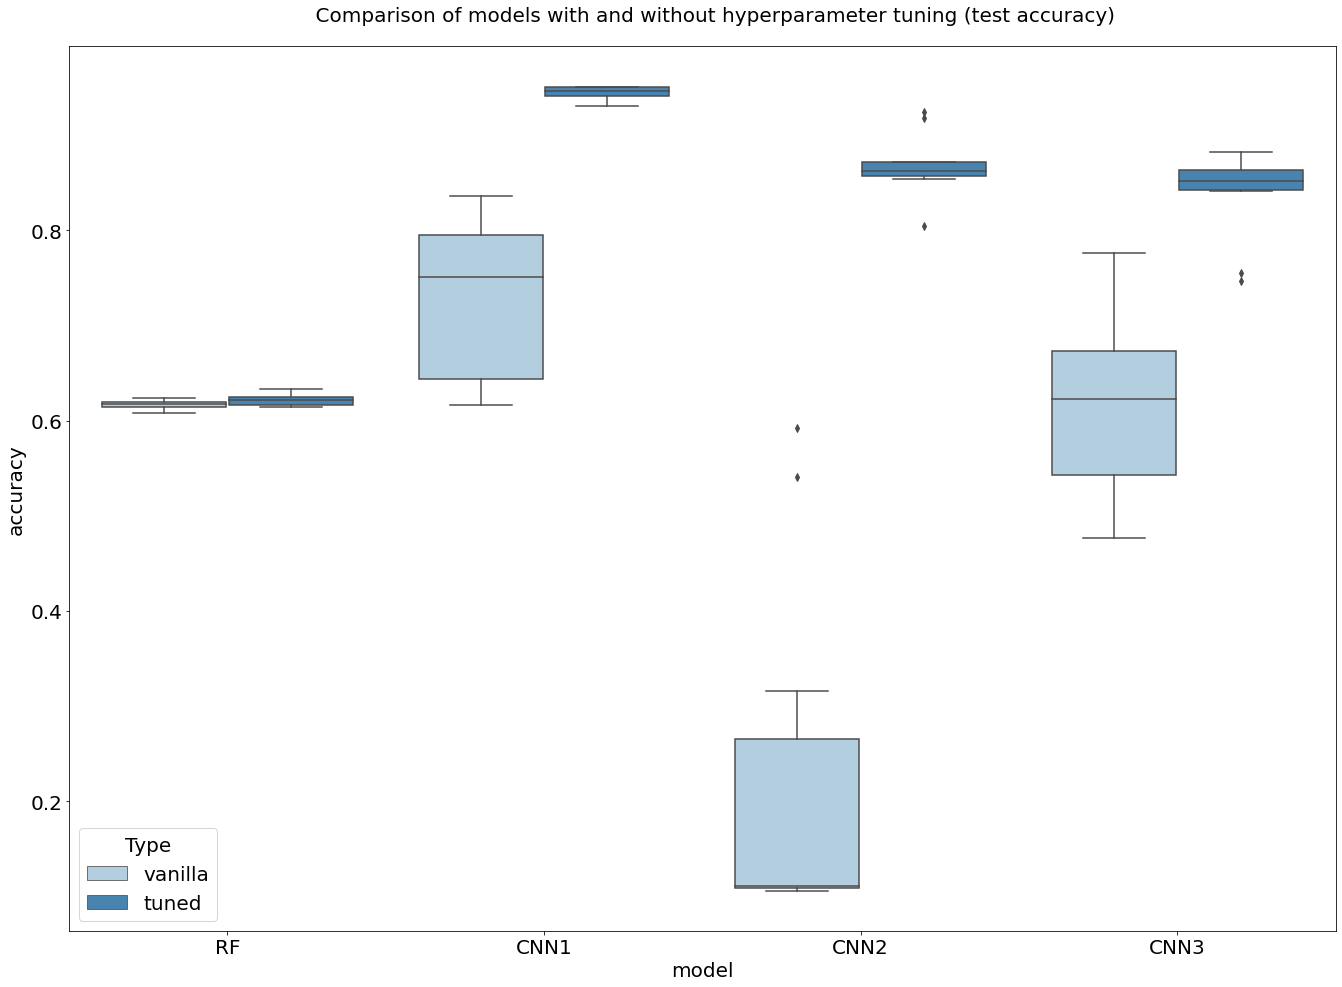

In [8]:
dt=pd.read_csv("prel.csv")
fig, ax1 = plt.subplots()
fig.set_size_inches(22.7,16.27)

ax1.set_title('    Comparison of models with and without hyperparameter tuning (test accuracy)', pad=25,loc='center', wrap=True)
ax1 = sns.boxplot(x="model", y="accuracy", hue="type",
                 data=dt, palette="Blues")
plt.legend(loc='lower left', title='Type')
plt.savefig('box_plot.pdf',dpi=100)

**Model blocks**

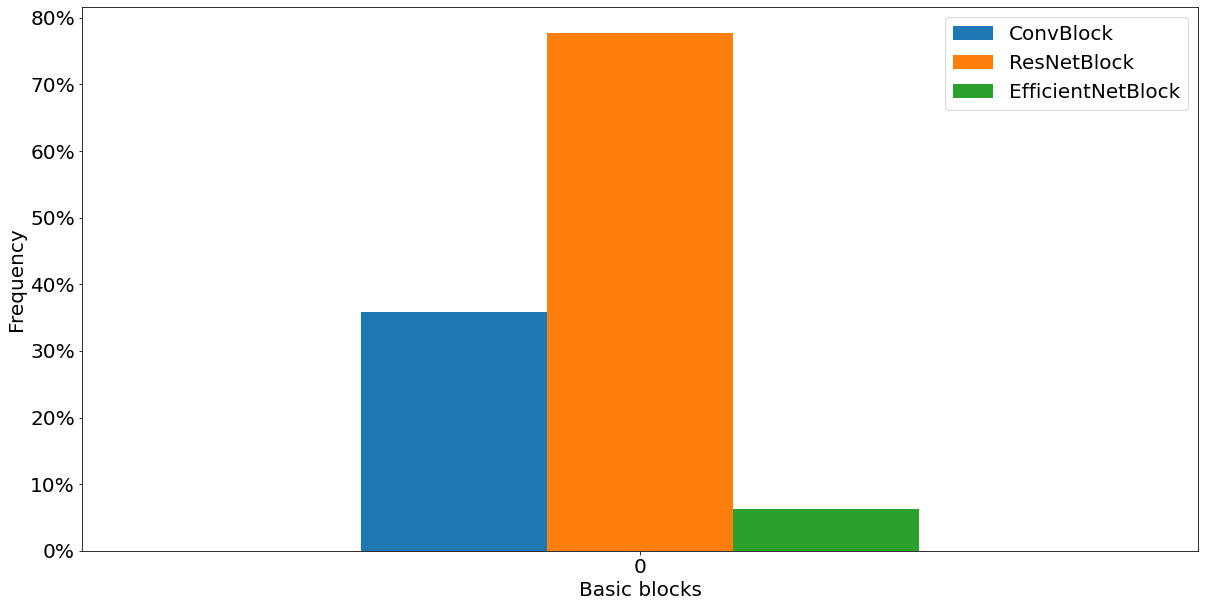

In [9]:
df=pd.read_csv("frequency.csv")
df.set_index('Unnamed: 0',inplace=True)
ax1=df.plot.bar(figsize=(20, 10),rot=0)
ax1.set_xlabel('Basic blocks')
ax1.set_ylabel('Frequency')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig('blocks_exp1.pdf')

**The remote sensing block**

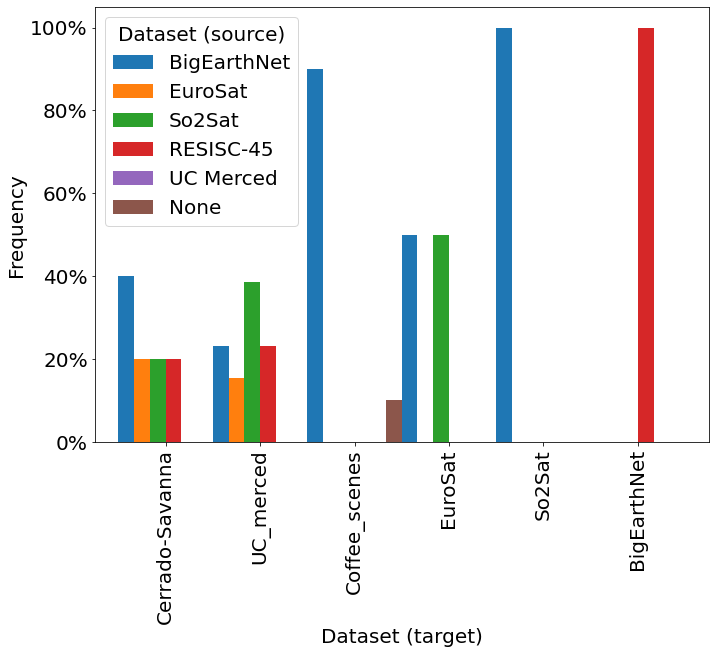

In [10]:
at= np.genfromtxt('ttt.csv',delimiter=',',dtype=float)
df = pd.DataFrame(at,columns=['BigEarthNet','EuroSat'	,'So2Sat'	,'RESISC-45'	,'UC Merced'	,'None'],index=['Cerrado-Savanna','UC_merced','Coffee_scenes','EuroSat','So2Sat','BigEarthNet'])
ax1=df.plot.bar(figsize=(11, 8),rot=90, width=1)
ax1.set_xlabel('Dataset (target)')
ax1.set_ylabel('Frequency')
ax1.legend(title='Dataset (source)')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('rsmodels_datasets.pdf',bbox_inches='tight')

**Confusion matrix**

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title= 'Normalized confusion matrix',
                          cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    thresh = cm.max() / 1.5 
    for i in range(cm.shape[0]):
    	for j in range(cm.shape[1]):
    		text=ax.text(j,i,'{:03.2f}'.format(cm[i,j]),ha='center',va='center',fontsize=25,color="white" if cm[i, j] > thresh else "black") #conditional color font 

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.savefig('conf_mtx.pdf')